In [19]:
import logging
import pandas as pd
import numpy as np
from sqlalchemy import select, func, distinct, or_, text
from nacsos_data.db import get_engine
from nacsos_data.db.schemas.imports import Import, m2m_import_item_table

logging.basicConfig(format='%(asctime)s [%(levelname)s] %(name)s: %(message)s', level=logging.INFO)
logger = logging.getLogger('import')
logger.setLevel(logging.DEBUG)

pd.options.display.max_columns = None
db_engine = get_engine(conf_file='../.config/remote.env')

PROJECT_ID = '3d761435-fe4f-4829-a33e-26fc52a46613'

In [20]:
res = {}
res_named = {}
with db_engine.session() as session:
    stmt = """SELECT i1.import_id as iid1, i2.import_id as iid2, im1.name as in1, im2.name as in2, count(distinct (i1.item_id)) as cnt
                FROM import im1
                         JOIN m2m_import_item i1 ON im1.import_id = i1.import_id
                         FULL OUTER JOIN m2m_import_item i2 ON i1.item_id = i2.item_id
                         JOIN import im2 ON im2.import_id = i2.import_id
                WHERE im1.project_id = :pid
                GROUP BY i1.import_id, i2.import_id, im2.name, im1.name
                ORDER BY im1.name, im2.name;"""

    rslt = session.execute(text(stmt), {'pid': PROJECT_ID}).mappings().all()
    for r in rslt:
        if r['iid1'] not in res:
            res[r['iid1']] = {}
        if r['in1'] not in res_named:
            res_named[r['in1']] = {}

        res[r['iid1']][r['iid2']] = r['cnt']
        res_named[r['in1']][r['in2']] = r['cnt']


In [21]:
df = pd.DataFrame(res)
df = df.reindex(sorted(df.columns), axis=1).sort_index()
df

06547d84-8f9a-4b22-993d-e1cbf7e6b54e  \
06547d84-8f9a-4b22-993d-e1cbf7e6b54e                                 103.0   
10046573-819c-4fb5-8aa1-3d92ab682701                                   NaN   
13ef9fb4-8d10-4a1e-b35d-3c8b7d6f4ad3                                 101.0   
18a17c5f-c96d-4fa4-b0a1-a639193ea1f7                                  12.0   
1e799d77-c6f1-4f25-916f-07f6a1189351                                   NaN   
22c15f11-eaa2-486a-9812-e6520fe75e22                                   1.0   
28f2f944-83b3-4cca-8d32-9066736ae8b0                                   NaN   
347c4fd1-70ba-49b1-b174-2251bd672070                                   NaN   
3b36cac1-89f5-45da-bb63-63d575cc7ac5                                   NaN   
419bd950-7847-4df3-959f-8c98e6bfb863                                   NaN   
83aa7428-945f-4e4a-b368-350e549d5e40                                  20.0   
8998c855-3d5b-45de-a53b-b6e1c94859b5                                   NaN   
8ea4d66e-3918-48f4-9bc6-574feb885dcd                                   NaN   
9b656ac6-bc73-43fa-ab75-2970c4c138f2                                   NaN   
a8de6a28-1e92-4468-8fa9-30dd9fa4df83                                   NaN   
b5ea5cff-7856-433f-a6ec-2c5510a23293                                   5.0   
beb43723-d07a-4224-999e-d4e50f5b0744                                  11.0   
ceb6a7b1-353b-451e-a56b-bda86a543bd0                                  31.0   
dce23cb8-901a-42ef-995d-e2b2dc7ddce3                                   1.0   
ef69e746-2f64-4cb2-86d0-c3b4154531e9                                  25.0   

                                      10046573-819c-4fb5-8aa1-3d92ab682701  \
06547d84-8f9a-4b22-993d-e1cbf7e6b54e                                   NaN   
10046573-819c-4fb5-8aa1-3d92ab682701                                1016.0   
13ef9fb4-8d10-4a1e-b35d-3c8b7d6f4ad3                                   NaN   
18a17c5f-c96d-4fa4-b0a1-a639193ea1f7                                   NaN   
1e799d77-c6f1-4f25-916f-07f6a1189351                                  12.0   
22c15f11-eaa2-486a-9812-e6520fe75e22                                   NaN   
28f2f944-83b3-4cca-8d32-9066736ae8b0                                  25.0   
347c4fd1-70ba-49b1-b174-2251bd672070                                   5.0   
3b36cac1-89f5-45da-bb63-63d575cc7ac5                                   5.0   
419bd950-7847-4df3-959f-8c98e6bfb863                                   NaN   
83aa7428-945f-4e4a-b368-350e549d5e40                                   NaN   
8998c855-3d5b-45de-a53b-b6e1c94859b5                                  13.0   
8ea4d66e-3918-48f4-9bc6-574feb885dcd                                 957.0   
9b656ac6-bc73-43fa-ab75-2970c4c138f2                                   NaN   
a8de6a28-1e92-4468-8fa9-30dd9fa4df83                                  23.0   
b5ea5cff-7856-433f-a6ec-2c5510a23293                                   NaN   
beb43723-d07a-4224-999e-d4e50f5b0744                                   NaN   
ceb6a7b1-353b-451e-a56b-bda86a543bd0                                   NaN   
dce23cb8-901a-42ef-995d-e2b2dc7ddce3                                   NaN   
ef69e746-2f64-4cb2-86d0-c3b4154531e9                                   NaN   

                                      13ef9fb4-8d10-4a1e-b35d-3c8b7d6f4ad3  \
06547d84-8f9a-4b22-993d-e1cbf7e6b54e                                 101.0   
10046573-819c-4fb5-8aa1-3d92ab682701                                   NaN   
13ef9fb4-8d10-4a1e-b35d-3c8b7d6f4ad3                                 121.0   
18a17c5f-c96d-4fa4-b0a1-a639193ea1f7                                  13.0   
1e799d77-c6f1-4f25-916f-07f6a1189351                                   2.0   
22c15f11-eaa2-486a-9812-e6520fe75e22                                   2.0   
28f2f944-83b3-4cca-8d32-9066736ae8b0                                   2.0   
347c4fd1-70ba-49b1-b174-2251bd672070                                   2.0   
3b36cac1-89f5-45da-bb63-63d575cc7ac5                      

In [22]:
df = pd.DataFrame(res_named)
df = df.reindex(sorted(df.columns), axis=1).sort_index()
df

Original data (bikes and scooters)  \
Original data (bikes and scooters)                                             1325.0   
Original data (buildings)                                                         NaN   
Original data (transport)                                                        12.0   
Original data (urban form)                                                        1.0   
Original data (waste)                                                             1.0   
Updated Query (11.07.2024) | < 2022 | Bikes                                     873.0   
Updated Query (11.07.2024) | < 2022 | Buildings                                   1.0   
Updated Query (11.07.2024) | < 2022 | Transport                                   8.0   
Updated Query (11.07.2024) | < 2022 | Urban form                                  2.0   
Updated Query (11.07.2024) | < 2022 | Waste                                       1.0   
Updated Query (11.07.2024) | >= 2022 | Bikes                                      NaN   
Updated Query (11.07.2024) | >= 2022 | Buildings                                  NaN   
Updated Query (11.07.2024) | >= 2022 | Transport                                  NaN   
Updated Query (11.07.2024) | >= 2022 | Urban form                                 NaN   
Updated Query (11.07.2024) | >= 2022 | Waste                                      NaN   
Updated WoS (01.07.2024) | Bikes                                                  1.0   
Updated WoS (01.07.2024) | Buildings                                              NaN   
Updated WoS (01.07.2024) | Transport                                              NaN   
Updated WoS (01.07.2024) | Urban form                                             NaN   
Updated WoS (01.07.2024) | Waste                                                  NaN   

                                                   Original data (buildings)  \
Original data (bikes and scooters)                                       NaN   
Original data (buildings)                                              646.0   
Original data (transport)                                                NaN   
Original data (urban form)                                               1.0   
Original data (waste)                                                    5.0   
Updated Query (11.07.2024) | < 2022 | Bikes                              1.0   
Updated Query (11.07.2024) | < 2022 | Buildings                        502.0   
Updated Query (11.07.2024) | < 2022 | Transport                         46.0   
Updated Query (11.07.2024) | < 2022 | Urban form                        47.0   
Updated Query (11.07.2024) | < 2022 | Waste                              5.0   
Updated Query (11.07.2024) | >= 2022 | Bikes                             NaN   
Updated Query (11.07.2024) | >= 2022 | Buildings                         1.0   
Updated Query (11.07.2024) | >= 2022 | Transport                         NaN   
Updated Query (11.07.2024) | >= 2022 | Urban form                        1.0   
Updated Query (11.07.2024) | >= 2022 | Waste                             1.0   
Updated WoS (01.07.2024) | Bikes                                         NaN   
Updated WoS (01.07.2024) | Buildings                                     1.0   
Updated WoS (01.07.2024) | Transport                                     NaN   
Updated WoS (01.07.2024) | Urban form                                    1.0   
Updated WoS (01.07.2024) | Waste                                         1.0   

                                                   Original data (transport)  \
Original data (bikes and scooters)                                      12.0   
Original data (buildings)                                                NaN   
Original data (transport)                                              530.0   
Original data (urban form)                                               NaN   
Original data (waste)                                                   13.0   
Updated Query (11.07

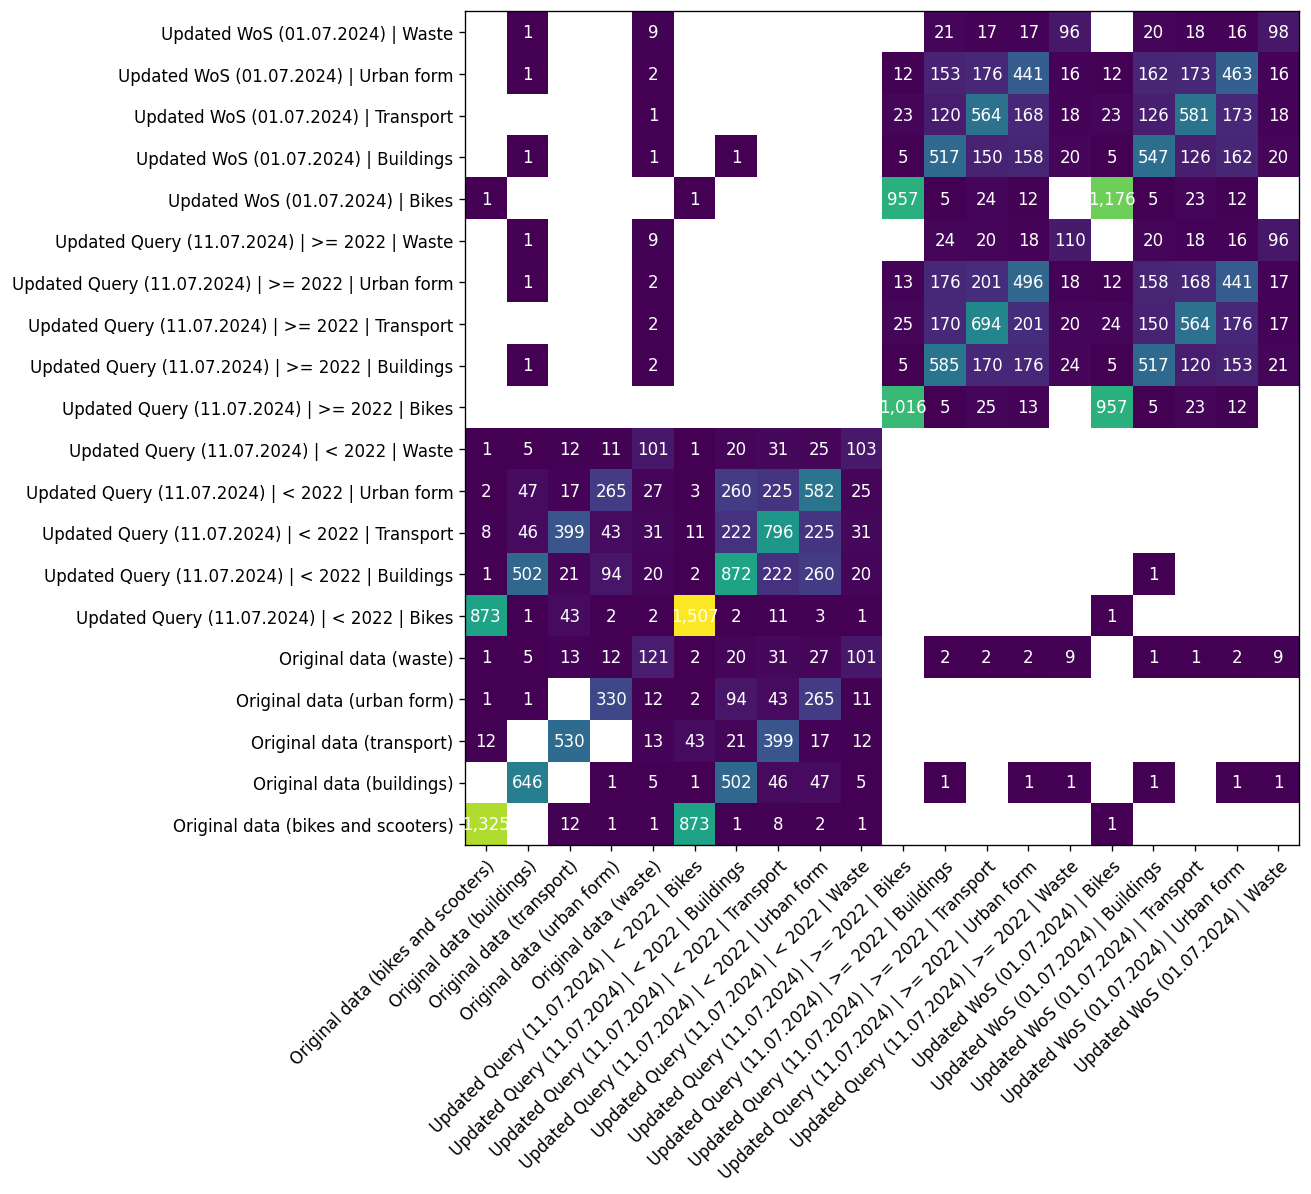

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(11, 11), dpi=120)
im = ax.imshow(df)
ax.set_xticks(np.arange(len(df.columns)), labels=df.columns)
ax.set_yticks(np.arange(len(df.columns)), labels=df.columns)
ax.invert_yaxis()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i, ci in enumerate(df.columns):
    for j, cj in enumerate(df.columns):
        texts = ax.text(j, i, f'{df.loc[ci][cj]:,.0f}', ha="center", va="center", color="w")

fig.tight_layout()

plt.show()

In [24]:
with db_engine.session() as session:
    imports = session.execute(text("""
        SELECT import.import_id, import.name, count(i1.item_id)
        FROM import
        JOIN m2m_import_item i1 ON import.import_id = i1.import_id
        WHERE project_id = :pid
        GROUP BY import.import_id, import.name
        ORDER BY import.name;"""),
        {'pid': PROJECT_ID}).mappings().all()
    for r in imports:
        print(r)

{'import_id': UUID('dce23cb8-901a-42ef-995d-e2b2dc7ddce3'), 'name': 'Original data (bikes and scooters)', 'count': 1325}
{'import_id': UUID('b5ea5cff-7856-433f-a6ec-2c5510a23293'), 'name': 'Original data (buildings)', 'count': 646}
{'import_id': UUID('18a17c5f-c96d-4fa4-b0a1-a639193ea1f7'), 'name': 'Original data (transport)', 'count': 530}
{'import_id': UUID('beb43723-d07a-4224-999e-d4e50f5b0744'), 'name': 'Original data (urban form)', 'count': 330}
{'import_id': UUID('13ef9fb4-8d10-4a1e-b35d-3c8b7d6f4ad3'), 'name': 'Original data (waste)', 'count': 121}
{'import_id': UUID('22c15f11-eaa2-486a-9812-e6520fe75e22'), 'name': 'Updated Query (11.07.2024) | < 2022 | Bikes', 'count': 1507}
{'import_id': UUID('10046573-819c-4fb5-8aa1-3d92ab682701'), 'name': 'Updated Query (11.07.2024) | >= 2022 | Bikes', 'count': 1016}
{'import_id': UUID('83aa7428-945f-4e4a-b368-350e549d5e40'), 'name': 'Updated Query (11.07.2024) | < 2022 | Buildings', 'count': 872}
{'import_id': UUID('347c4fd1-70ba-49b1-b174-

In [25]:
stmt_total = """
WITH buckets as (SELECT generate_series(:miny, :maxy, 1) as bucket)
SELECT b.bucket as year, count(ai.item_id) as cnt
FROM buckets b
    LEFT OUTER JOIN academic_item ai on b.bucket = ai.publication_year
                    AND project_id = :pid
GROUP BY b.bucket
ORDER BY b.bucket;
"""

stmt_imp = """
WITH buckets as (SELECT generate_series(:miny, :maxy, 1) as bucket)
SELECT b.bucket as year, count(ai.item_id) as cnt
FROM buckets b
        LEFT OUTER JOIN academic_item ai on b.bucket = ai.publication_year
        JOIN m2m_import_item mi ON ai.item_id = mi.item_id
WHERE mi.import_id=:iid
GROUP BY b.bucket
ORDER BY b.bucket;
"""

MINY = 1990
MAXY = 2024
acc = {y: {} for y in range(MINY, MAXY + 1, 1)}
with db_engine.session() as session:
    rslt = session.execute(text(stmt_total), {'pid': PROJECT_ID, 'miny': MINY, 'maxy': MAXY}).mappings().all()
    for r in rslt:
        acc[r['year']]['Total'] = r['cnt']
    
    for imp in imports:
        rslt = session.execute(text(stmt_imp), {'pid': PROJECT_ID, 'iid': str(imp['import_id']), 'miny': MINY, 'maxy': MAXY}).mappings().all()
        for r in rslt:
            acc[r['year']][imp['name']] = r.get('cnt', 0)

In [26]:
pd.DataFrame(acc)

1990  1991  1992  1993  \
Total                                               0.0   1.0   4.0   1.0   
Original data (bikes and scooters)                  NaN   1.0   1.0   NaN   
Updated Query (11.07.2024) | < 2022 | Bikes         NaN   1.0   4.0   1.0   
Original data (transport)                           NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Transport     NaN   NaN   NaN   NaN   
Original data (buildings)                           NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Buildings     NaN   NaN   NaN   NaN   
Original data (waste)                               NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Waste         NaN   NaN   NaN   NaN   
Original data (urban form)                          NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Urban form    NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Bikes        NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Buildings    NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Transport    NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Urban form   NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Waste        NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Bikes                    NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Buildings                NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Transport                NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Urban form               NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Waste                    NaN   NaN   NaN   NaN   

                                                   1994  1995  1996  1997  \
Total                                               4.0   5.0   4.0   6.0   
Original data (bikes and scooters)                  NaN   1.0   1.0   3.0   
Updated Query (11.07.2024) | < 2022 | Bikes         3.0   4.0   4.0   4.0   
Original data (transport)                           1.0   1.0   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Transport     1.0   1.0   NaN   NaN   
Original data (buildings)                           NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Buildings     NaN   NaN   NaN   NaN   
Original data (waste)                               NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Waste         NaN   NaN   NaN   NaN   
Original data (urban form)                          NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | < 2022 | Urban form    NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Bikes        NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Buildings    NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Transport    NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Urban form   NaN   NaN   NaN   NaN   
Updated Query (11.07.2024) | >= 2022 | Waste        NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Bikes                    NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Buildings                NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Transport                NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Urban form               NaN   NaN   NaN   NaN   
Updated WoS (01.07.2024) | Waste                    NaN   NaN   NaN   NaN   

                                                   1998  1999  2000  2001  \
Total                                               7.0   8.0   7.0   9.0   
Original data (bikes and scooters)                  1.0   3.0   1.0   NaN   
Updated Query (11.07.2024) | < 2022 | Bikes         7.0   3.0   5.0   5.0   
Original data (transport)                           NaN   1.0   1.0   2.0   
Updated Query (11.07.2024) | < 2022 | Transport     NaN   1.0   1.0   3.0   
Original data (buildings)                           NaN   1.0   1.0   NaN   
Updated Query (11.07.2024) | < 2022 | Buildings     NaN   1.0   1.0   1.0   
Original data (waste)                        

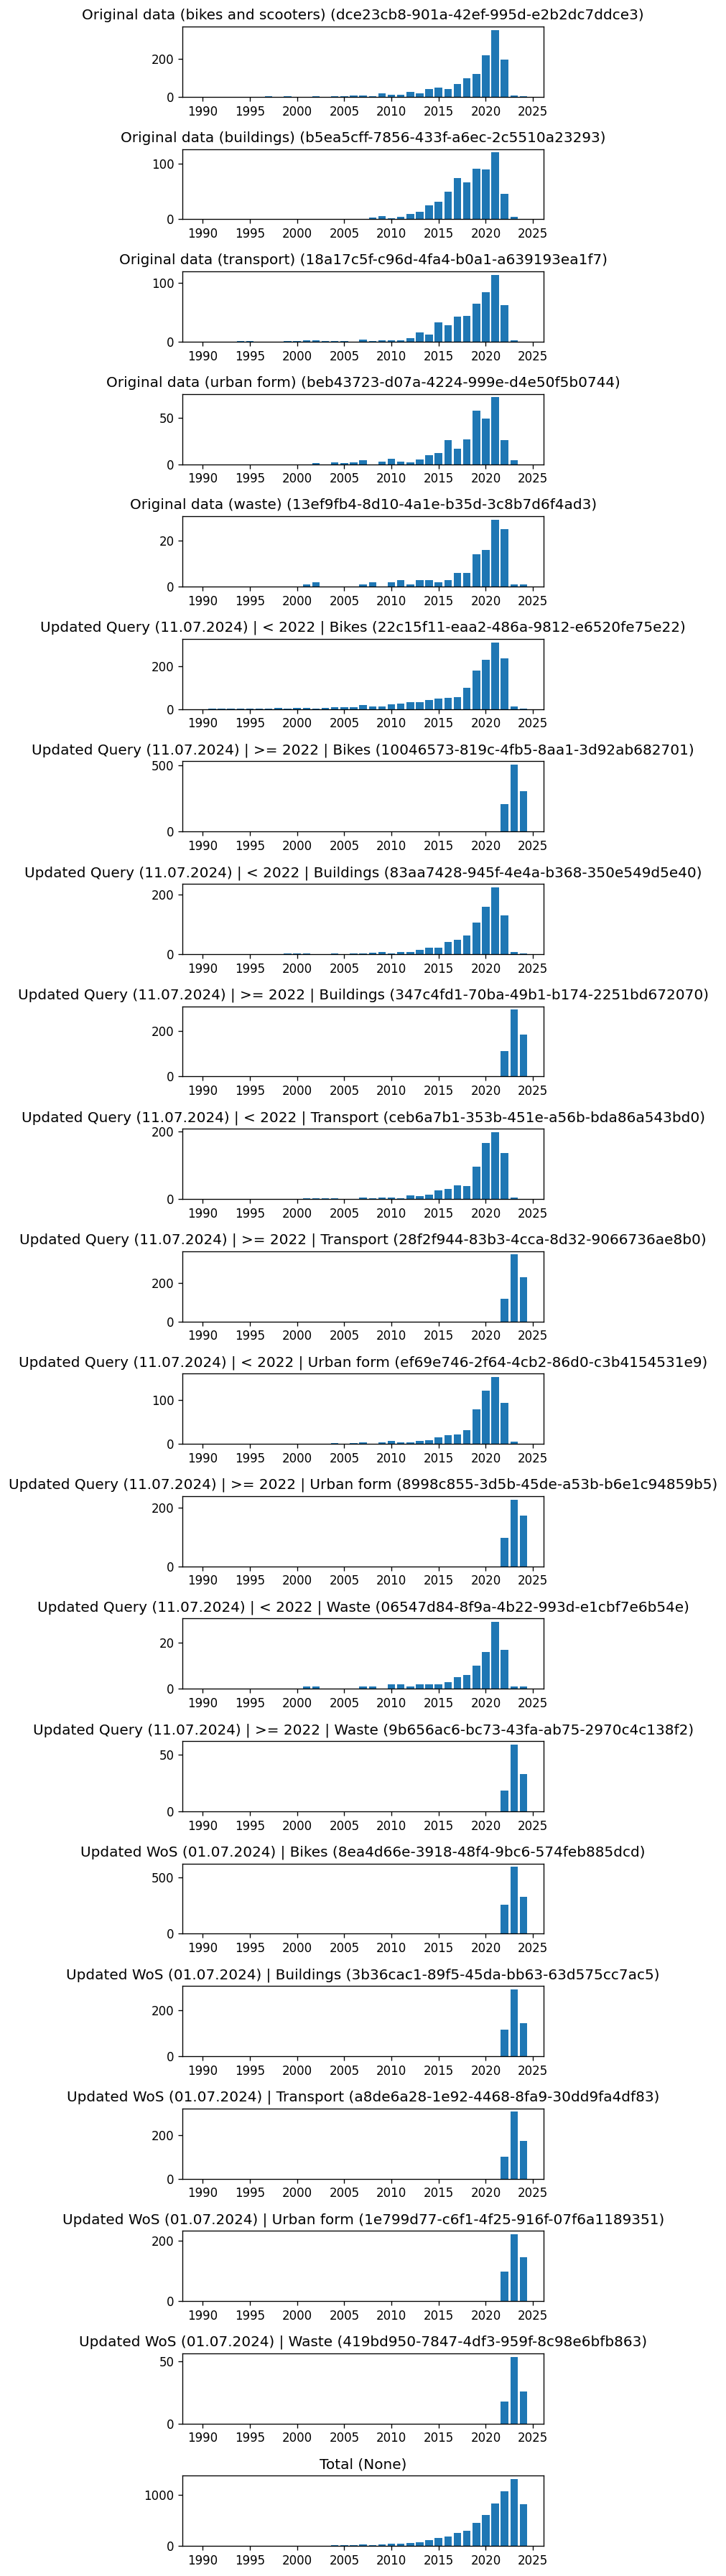

In [27]:
fig, axes = plt.subplots(len(imports) + 1, 1, dpi=120, figsize=(5, 30))

for i, imp in enumerate(imports + [{'name': 'Total'}]):
    ax = axes[i]
    ax.set_title(f'{imp['name']} ({imp.get('import_id')})')
    ax.bar(sorted(acc.keys()), [acc[k].get(imp['name'], 0) for k in sorted(acc.keys())])

fig.tight_layout()

In [ ]:
acc = None
for k, df in dfs.items():
    print(k)
    cnts = df[col].value_counts()
    print(cnts)
    if acc is None:
        acc = cnts
    else:
        acc.add(cnts, fill_value=0)
print('Total')
print(acc)